In [113]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from utils import name_generator
seed = 42
random.seed(seed)

In [114]:
''' not sure if i need this. 
Might be helpful in simulating how to maximize accuracy. 
Accuracy is a relation between a credence and the truth.

"There are many different measures of accuracy that can be used; in this paper I will be assuming the
most standardly used measure, the Brier score, but as far as I am aware, assuming a different accuracy 
measure would not necessarily impact the argument." - https://link.springer.com/article/10.1007/s11229-020-02849-z
'''
class World():
    '''maps propositions to truth values'''
    def __init__(self) -> None:
        pass

In [115]:
class Ideal_Credences():
    ''' 
    Maps propositions to credences

    truth of a proposition is binary but ideal credence can range from 0 to 1. 
    Ideal credence is the credence that best fulfills epistemic norms given all 
    available evidence (not necessarily accessible to you).

    "I will assume that credences are sharp and
    that the uniqueness thesis is true (Elga 2010; Kopec & Titelbaum 2016). In other
    words, I will assume that for any proposition p and any set of evidence E there is
    only one maximally rational credence that a perfectly rational epistemic agent could
    have, which is a sharp value and not an interval, and any deviation from the unique
    maximally rational credence constitutes a deviation from rationality."
     - https://link.springer.com/article/10.1007/s11229-020-02849-z
    '''
    def __init__(self, propositions: list) -> None:
        self.credence_function = {}
        self.propositions = propositions
        

    def random_generate_ideal_credences(self):
        self.credence_function = {proposition: random.uniform(0, 1) for proposition in self.propositions}
        


In [191]:
class Expert_Group():
    '''
    Experts are represented at the group level, questions of belief merging and aggregation 
    within the group are abstracted. individual experts are simulated for fun.

    Expert groups are static in this model. Their credences do not update

    Expert groups are defined relative to an ideal credence function (since the attribute "bias" is relative to ideal credence)
    '''
    def __init__(self, ideal_credence_obj:Ideal_Credences, name = None, simulation_sample_size:int = 1000, initial_competence:float = 0.2, initial_consensus:float = 0.2, initial_bias:float = 0.1) -> None:
        if name is not None:
            self.name = name
        else:
            self.name = name_generator()
        # simulation settings
        self.sample_size = simulation_sample_size
        # each expert group is defined by three attributes, competence (precision), bias (accuracy), and consensus (variance of expert judgements)
        self.competence = initial_competence
        self.bias = initial_bias
        self.consensus = initial_consensus
        self.ideal_credences = ideal_credence_obj.credence_function
        self.propositions = list(self.ideal_credences.keys())
        # each expert group has a set of aggregate judgements, which are functions that map credences to propositions
        self.aggregate_judgements = {} 
        self.get_aggregate_judgements()


    def get_aggregate_judgements(self):
        ''' take in a list of propositions'''
        keys = self.propositions
        values = np.array(list(self.ideal_credences.values()))
        
        # Apply bias and add randomness with specified standard deviation
        aggregate_judgement_values = np.random.normal(values + self.bias, self.competence, len(values))
        
        # Clip values to be within [0, 1]
        aggregate_judgement_values_clipped = np.clip(aggregate_judgement_values, 0, 1)
        
        self.aggregate_judgements = dict(zip(keys, aggregate_judgement_values_clipped))

    
    def simulate_expert_individual_judgements(self, plot = False):
        # get a dictionary of numpy arrays centered around the expert's aggregate judgement. mostly for fun and visualization
        # assumes a very naive view of belief aggregation.
        self.individual_judgements = {prop: np.clip(np.random.normal(loc=val, scale=self.consensus, size=self.sample_size), 0, 1)
                   for prop, val in self.aggregate_judgements.items()}
        if plot:
            self.plot_individual_judgements()

    
    def plot_individual_judgements(self):
        """
        Plots the samples for each proposition in self.aggregate_judgements.
        Each proposition's samples are plotted as a histogram.
        """
        n_props = len(self.propositions)
        label = f'{self.name} (Bias: {self.bias}, Consensus: {self.consensus}, Competence: {self.competence})'
        plt.figure(figsize=(12, 3 * n_props))

        for i, (prop, values) in enumerate(self.individual_judgements.items(), start=1):
            plt.subplot(n_props, 1, i)
            sns.histplot(values, kde=True, bins='auto', color='skyblue', label=label, stat="density")
            plt.axvline(x=self.aggregate_judgements[prop], color='r', linestyle='--', label=f'Aggregate judgement')
            plt.axvline(x=self.ideal_credences[prop], color='b', linestyle='--', label=f'Ideal credence')
            plt.legend()
            plt.title(f'Samples Distribution for {self.name} judgements on "{prop}"')
            plt.xlabel('Value')
            plt.xlim(0,1)
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()



#### Questions
        '''
        1. should expert group attributes be relativised to single beliefs? if so, 
        it makes it hard to capture how distrust spreads to other propositions.
        2. The truth + bias parameter should determine the aggregate judgement of experts on 
        every single proposition. This seems problematic. shouldn't it vary? But bias on 
        different propositions should have a strong correlation with each other too.
        '''

In [117]:
# maybe not necessary
# agent's belief. this also stores the expert groups relevant for the belief
# class Credence():
#     def __init__(self, proposition, initial_credence = 0.5) -> None:
#         self.content = proposition
#         self.value = initial_credence
#         self.relevant_expert_groups = []

In [118]:
class Bayesian_Agent():
    def __init__(self) -> None:
        self.credences = {} #keys are propositions, values are Credence objects
        self.expert_group_representations = {}
        pass
    
    def update_expert_group_representation():
        pass
    def update_proposition_credence(proposition, evidence, source):
        pass

In [187]:
def plot_all_individual_judgements(expert_groups):
    """
    Plots the individual judgements of multiple expert groups on the same histogram for each proposition.

    Parameters:
    - expert_groups: A list of Expert_Group instances.
    """
    if not expert_groups:
        print("No expert groups provided.")
        return
    
    # Define a list of colors or use a colormap
    colors = sns.color_palette('hsv', len(expert_groups))

    # Assuming all expert groups have the same propositions
    propositions = list(expert_groups[0].propositions)
    n_props = len(propositions)
    plt.figure(figsize=(14, 4 * n_props + 2))

    for i, prop in enumerate(propositions, start=1):
        plt.subplot(n_props, 1, i)
        for idx, expert_group in enumerate(expert_groups):
            # Use the same color for individual judgements and aggregate judgement line of the expert group
            group_color = colors[idx]
            label = f'{expert_group.name} (Bias: {expert_group.bias}, Consensus: {expert_group.consensus}, Competence: {expert_group.competence})'
            sns.histplot(expert_group.individual_judgements[prop], kde=True, bins='auto', color=group_color, label=label, stat="density")
            plt.axvline(x=expert_group.aggregate_judgements[prop], color=group_color, linestyle='--', label=f'{expert_group.name} aggregate judgement')
        
        # Ideal credence line
        plt.axvline(x=expert_groups[0].ideal_credences[prop], color='black', linestyle='--', label=f'Ideal credence for "{prop}"')
        plt.legend()
        plt.title(f'Individual Judgements Distribution for "{prop}"')
        plt.xlabel('Value')
        plt.xlim(0, 1)
        plt.ylabel('Density')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2, title='')
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.show()

In [188]:
'''
do i need this?
An accuracy measure A is a function which takes a
credence function c at a world w, and yields as its output a number A(c, w) which
is a measure of the accuracy of the credence function at that world
'''

'\ndo i need this?\nAn accuracy measure A is a function which takes a\ncredence function c at a world w, and yields as its output a number A(c, w) which\nis a measure of the accuracy of the credence function at that world\n'

In [189]:
propositions = ['p1', 
                'p2',
                'p3']
# ideal credence should be unique in each world, w. 
ideal_credence_obj = Ideal_Credences(propositions)
ideal_credence_obj.random_generate_ideal_credences()
climate_scientists = Expert_Group(ideal_credence_obj,name = 'Climate Scientists',initial_bias=0.1,initial_competence=0.1,initial_consensus=0.05)
climate_scientists.get_aggregate_judgements()
climate_scientists.simulate_expert_individual_judgements(plot=False)
climate_skeptics = Expert_Group(ideal_credence_obj,name = 'Climate Skeptics',initial_bias=-0.3,initial_competence=0.1,initial_consensus=0.05)
climate_skeptics.get_aggregate_judgements()
climate_skeptics.simulate_expert_individual_judgements(plot=False)

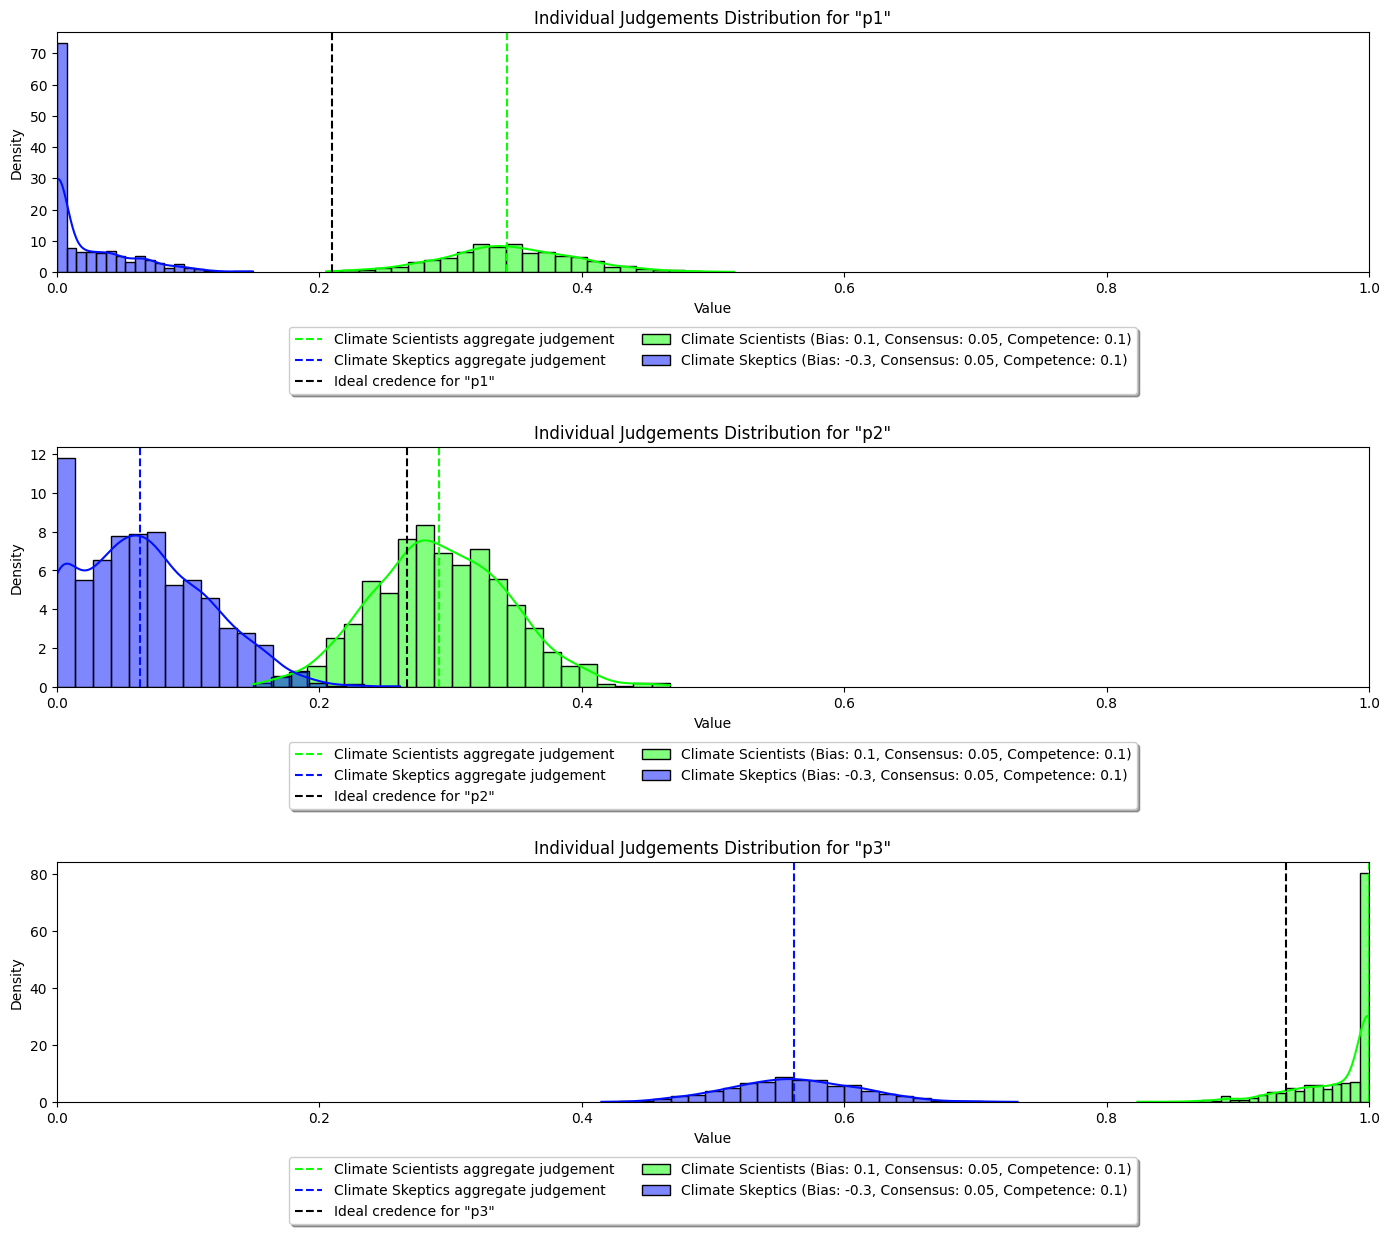

In [190]:
expert_groups = [climate_scientists,climate_skeptics]
plot_all_individual_judgements(expert_groups)